In [1]:
#
# Created on Sun Dec 13 21:12:54 2015
#
# @author: ldierker
# Modified by: mcolosso
#

In [2]:
%matplotlib inline

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

# Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

#pd.set_option('display.float_format', lambda x:'%.3f'%x)

In [3]:
#os.chdir("C:/Users/MColosso/Documents/CURSOS/Wesleyan University/Machine Learning for Data Analysis")

In [4]:
#
# Data Engineering and Analysis
#

In [5]:
#Load the dataset

loans = pd.read_csv("./LendingClub.csv", low_memory = False)

# LendingClub.csv is a dataset taken from The LendingClub (https://www.lendingclub.com/)
# which is a peer-to-peer leading company that directly connects borrowers and potential
# lenders/investors

In [6]:
#
# Exploring the target column
#

# The target column (label column) of the dataset that we are interested in is called
# `bad_loans`. In this column **1** means a risky (bad) loan **0** means a safe  loan.
#
# In order to make this more intuitive, we reassign the target to be:
# * **+1** as a safe  loan, 
# * **-1** as a risky (bad) loan. 
#
# We put this in a new column called `safe_loans`.

In [7]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans.drop('bad_loans', axis = 1, inplace = True)

In [8]:
# Select features to handle

predictors = ['grade',                     # grade of the loan
              'sub_grade',                 # sub-grade of the loan
              'short_emp',                 # one year or less of employment
              'emp_length_num',            # number of years of employment
              'home_ownership',            # home_ownership status: own, mortgage or rent
              'dti',                       # debt to income ratio
              'purpose',                   # the purpose of the loan
              'term',                      # the term of the loan
              'last_delinq_none',          # has borrower had a delinquincy
              'last_major_derog_none',     # has borrower had 90 day or worse rating
              'revol_util',                # percent of available credit being used
              'total_rec_late_fee',        # total late fees received to day
             ]

target = 'safe_loans'                    # prediction target (y) (+1 means safe, -1 is risky)

# Extract the predictors and target columns
loans = loans[predictors + [target]]

# Delete rows where any or all of the data are missing
data_clean = loans.dropna()

In [9]:
# Convert categorical variables into binary variables
# (Categorical features are not, yet, supported by sklearn DecisionTreeClassifier)

data_clean = pd.get_dummies(data_clean, prefix_sep = '=')

In [10]:
print(data_clean.dtypes)

(data_clean.describe()).T

short_emp                       int64
emp_length_num                  int64
dti                           float64
last_delinq_none                int64
last_major_derog_none           int64
revol_util                    float64
total_rec_late_fee            float64
safe_loans                      int64
grade=A                       float64
grade=B                       float64
grade=C                       float64
grade=D                       float64
grade=E                       float64
grade=F                       float64
grade=G                       float64
sub_grade=A1                  float64
sub_grade=A2                  float64
sub_grade=A3                  float64
sub_grade=A4                  float64
sub_grade=A5                  float64
sub_grade=B1                  float64
sub_grade=B2                  float64
sub_grade=B3                  float64
sub_grade=B4                  float64
sub_grade=B5                  float64
sub_grade=C1                  float64
sub_grade=C2

,count,mean,std,min,25%,50%,75%,max
short_emp,122607.0,0.123672,0.329208,0.0,0.00,0.00,0.00,1.00
emp_length_num,122607.0,6.370256,3.736014,0.0,3.00,6.00,11.00,11.00
dti,122607.0,15.496888,7.497442,0.0,9.88,15.26,20.85,39.88
last_delinq_none,122607.0,0.588115,0.492177,0.0,0.00,1.00,1.00,1.00
last_major_derog_none,122607.0,0.873906,0.331957,0.0,1.00,1.00,1.00,1.00
revol_util,122607.0,53.716307,25.723881,0.0,34.80,55.70,74.30,150.70
total_rec_late_fee,122607.0,0.742344,5.363268,0.0,0.00,0.00,0.00,208.82
safe_loans,122607.0,0.622371,0.782726,-1.0,1.00,1.00,1.00,1.00
grade=A,122607.0,0.181996,0.385843,0.0,0.00,0.00,0.00,1.00
grade=B,122607.0,0.303180,0.459634,0.0,0.00,0.00,1.00,1.00


In [11]:
# Extract new features names
features = data_clean.columns.values
features = features[features != target]

In [12]:
#
# Modeling and Prediction
#

In [13]:
#Split into training and testing sets

predictors = data_clean[features]

targets = data_clean.safe_loans

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, 
                                                              test_size = .4)

print('pred_train.shape', pred_train.shape)
print('pred_test.shape',  pred_test.shape)
print('tar_train.shape',  tar_train.shape)
print('tar_test.shape',   tar_test.shape)

pred_train.shape (73564, 67)
pred_test.shape (49043, 67)
tar_train.shape (73564,)
tar_test.shape (49043,)


In [14]:
#Build model on training data
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 25)
classifier = classifier.fit(pred_train, tar_train)

predictions = classifier.predict(pred_test)

conf_matrix = sklearn.metrics.confusion_matrix(tar_test, predictions)

print(conf_matrix)

[[ 1200  7957]
 [ 2068 37818]]


In [15]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.79558754562322864

In [16]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train, tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.0116846   0.13741726  0.29752994  0.02180671  0.01403449  0.28940768
  0.03293531  0.00951938  0.0037876   0.00329254  0.00387515  0.00546364
  0.00417739  0.00154924  0.00084011  0.00069246  0.00081152  0.00096394
  0.00116574  0.00167741  0.00205909  0.00237266  0.00246947  0.00251691
  0.00305698  0.00325398  0.00302473  0.00332757  0.00274992  0.00220827
  0.00224134  0.00220883  0.00217347  0.00213623  0.00171983  0.00202893
  0.00204825  0.0020539   0.00177719  0.00121543  0.00119387  0.00116458
  0.00113021  0.00095636  0.00060222  0.00054441  0.00046878  0.00038406
  0.00040649  0.00745245  0.00060827  0.00606502  0.00744603  0.00355398
  0.00929081  0.01264373  0.00652372  0.00243849  0.00420151  0.0037273
  0.00321748  0.00838174  0.00601524  0.00236188  0.00309275  0.00558167
  0.01127186]


In [17]:
# Show more important features
more_important_features = list()
predictors_list = list(predictors.columns.values)
idx = 0
for imp in model.feature_importances_:
    if imp >= 0.1:
        more_important_features.append(predictors_list[idx])
    idx += 1
print('More important features:', more_important_features)

More important features: ['emp_length_num', 'dti', 'revol_util']


In [18]:
#
# Running a different number of trees and see the effect
# of that on the accuracy of the prediction
#

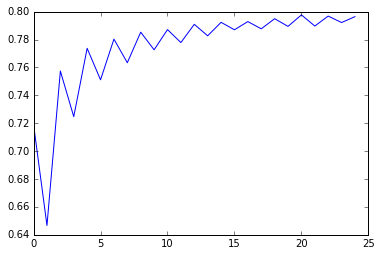

In [19]:
trees = range(25)
accuracy = np.zeros(25)

for idx in range(len(trees)):
   classifier = RandomForestClassifier(n_estimators = idx + 1)
   classifier = classifier.fit(pred_train,tar_train)
   predictions = classifier.predict(pred_test)
   accuracy[idx] = sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()  # Clear axis
plt.plot(trees, accuracy)